<a href="https://colab.research.google.com/github/Panchol211/week13-IP/blob/main/R_EDA_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Problem

# Specifying the Research Question

The goal of this analysis is to identify individuals who are most likely to click on a cryptography course advertisement. This project uses R for analysis



# Defining the Metric for Success


The project will be considered a success when we are able to clean and analyse past data to segment blog users and identify individuals who should be targeted for an advertisement





# Understanding the Context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She has employed my services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads



# Recording the Exprimental Design

Below are the steps that will be followed in this analysis in order to respond to the research question satisfactorily:



Read the Data

Check the Data

Data Cleaning

Univariate Analysis

Bivariate Analysis

Conclusion and Recommendation

# Importing Relevant Libraries

In [58]:
install.packages("googledrive")
library("googledrive")

if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")){ 
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
}             

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Reading the Data

In [59]:
library(data.table)
ad <- fread('/content/advertising.csv')
head(ad)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,03/27/2016 0:53,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,03/13/2016 20:35,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,01/10/2016 2:31,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,06/03/2016 3:36,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,05/19/2016 14:30,0


# Checking the Data

In [60]:
# Checking the top records 

head(ad)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,03/27/2016 0:53,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,03/13/2016 20:35,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,01/10/2016 2:31,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,06/03/2016 3:36,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,05/19/2016 14:30,0


In [61]:
# Checking the bottom records

tail(ad)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,04/04/2016 3:57,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,02/11/2016 21:49,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,04/22/2016 2:07,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,02/01/2016 17:24,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,03/24/2016 2:35,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,06/03/2016 21:43,1


In [62]:
# Checking the total number of records

nrow(ad)

[1] 1000

In [63]:
# Checking the total number of columns

ncol(ad)

[1] 10

In [64]:
# Checking all column names

names(ad)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

In [65]:
# Checking the data types of each column

str(ad)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "03/27/2016 0:53" "04/04/2016 1:39" "03/13/2016 20:35" "01/10/2016 2:31" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [66]:
# Checking the number of unique values in each column

lengths(lapply(ad, unique))

Daily Time Spent on Site                      Age              Area Income 
                     900                       43                     1000 
    Daily Internet Usage            Ad Topic Line                     City 
                     966                     1000                      969 
                    Male                  Country                Timestamp 
                       2                      237                      997 
           Clicked on Ad 
                       2

In [67]:
# Checking the summary of the data

summary(ad)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

# Data Cleaning

Missing Data

In [68]:
colSums(is.na(ad))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

Outliers

In [69]:
# creating a variable with only numeric columns

library(tidyverse)
my_data <- ad %>% select(1,2,3,4,7,10)

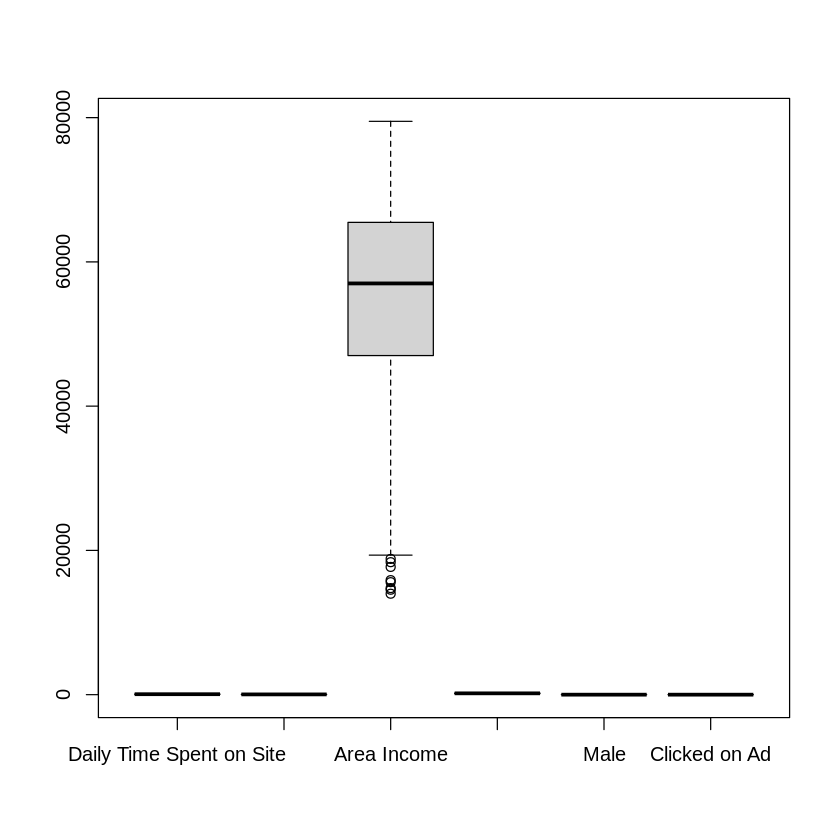

In [70]:
# Previewing outliers for numeric columns using boxplots

boxplot(my_data)


*   We see that 'area income' is the only attribute with outliers. We shall investigate each column individually for further analysis



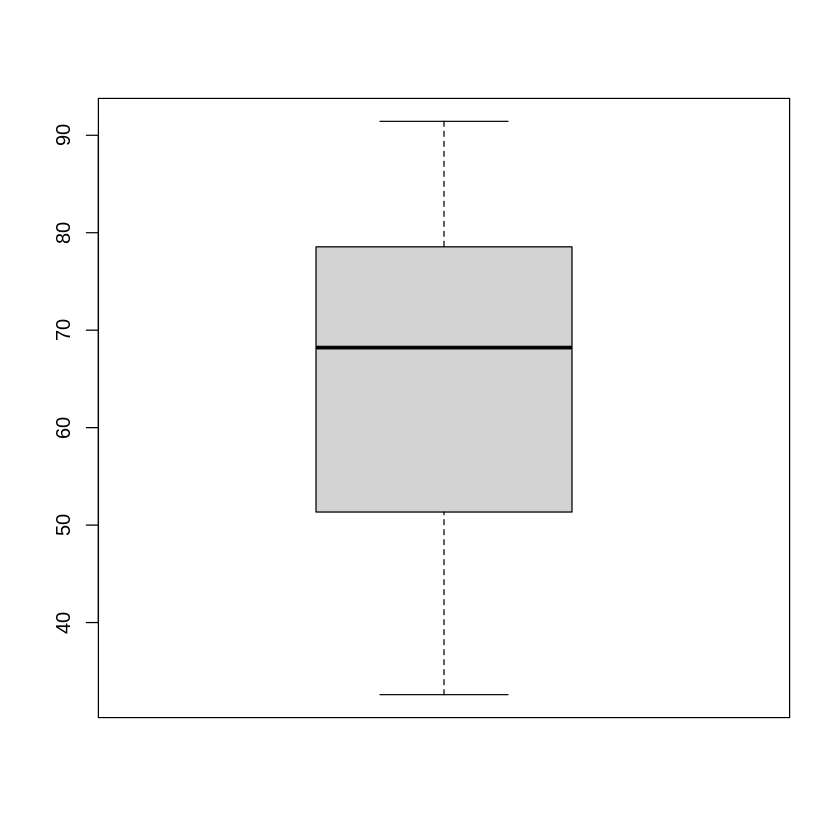

In [71]:
# Boxplot for daily time spent variable

boxplot(ad$`Daily Time Spent on Site`)

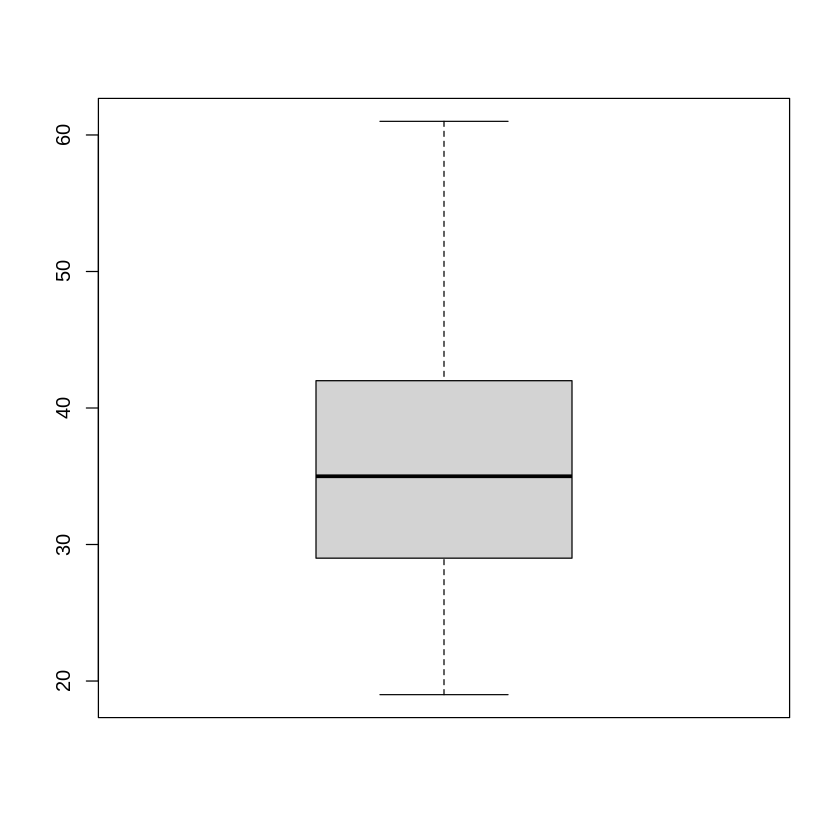

In [72]:
# Boxplot for age variable

boxplot(ad$Age)

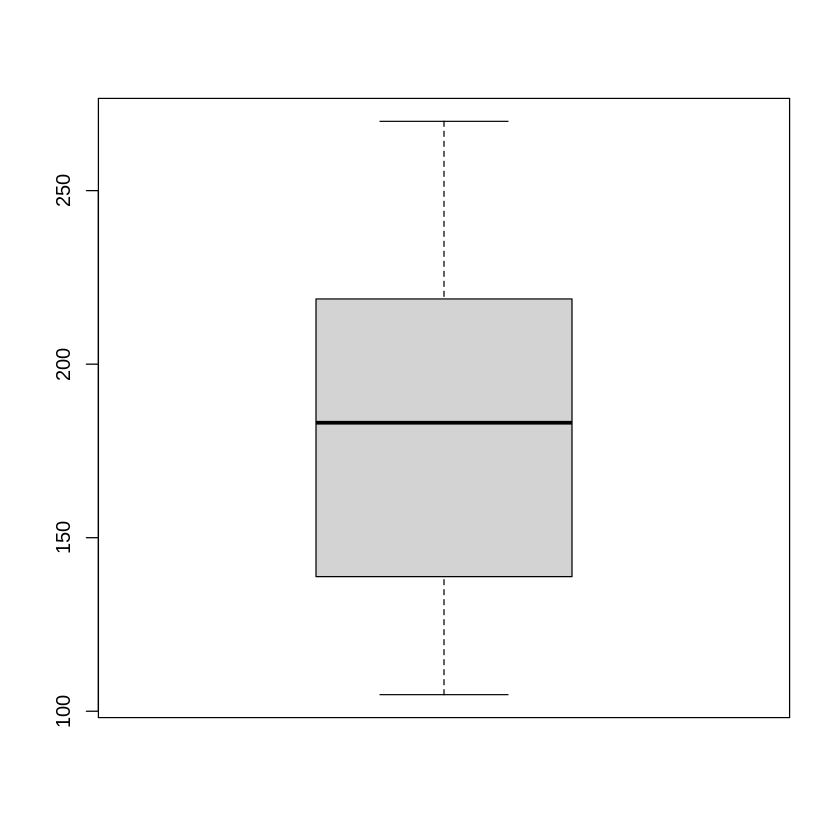

In [73]:
# Boxplot for daily internet usage variable

boxplot(ad$`Daily Internet Usage`)

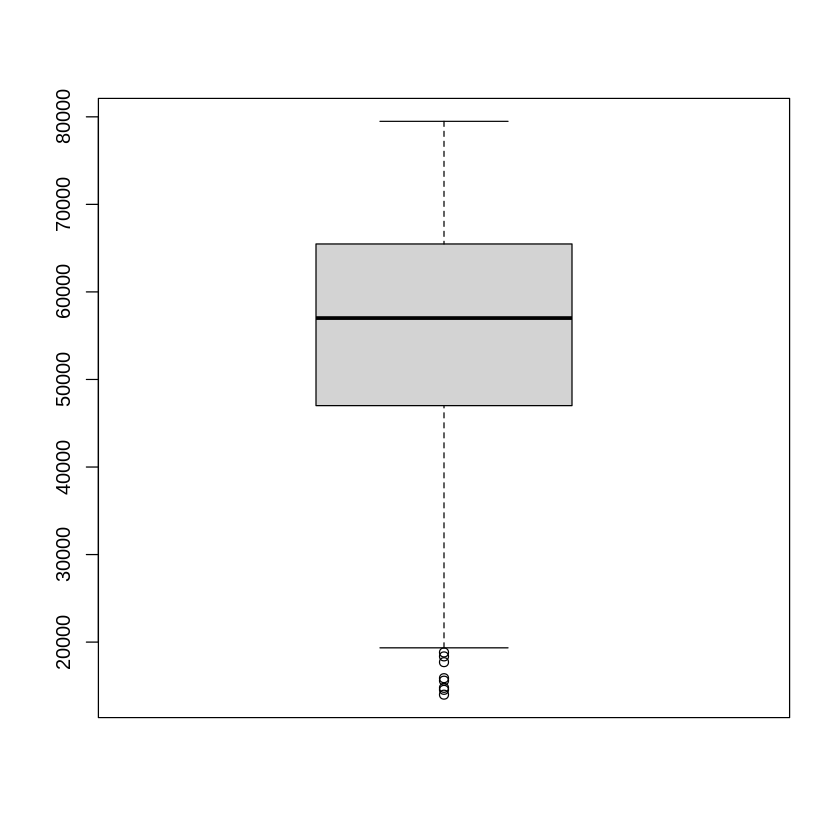

In [74]:
# Boxplot for area income variable

boxplot(ad$`Area Income`)

In [75]:
# Displaying all outliers in the income column

boxplot.stats(ad$`Area Income`)$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

In [76]:
# Checking the countries associated with outlier incomes

ad$Country[ad$`Area Income` %in% c(17709.98, 18819.34, 15598.29, 15879.1, 14548.06, 13996.5, 14775.5, 18368.57)]

[1] "Belize"      "Algeria"     "Azerbaijan"  "Tajikistan"  "Lebanon"    
[6] "El Salvador" "Jersey"      "Luxembourg"



*  We observe that the lower 'outlier' income numbers are associated with developing countries. This is consistent with observations in the real world
We shall keep the outliers because they are important 



Anomalies

In [77]:
# Checking for duplicate data

duplicated_rows <- ad[duplicated(ad),]
duplicated_rows

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>




*   No duplicate records in the dataset



# Exploratory Data Analysis

# Univariate Analysis



*   In this section, we will investigate each variable individually. The steps here include calculating and interpreting measures of central tendency (mode, median, mean) as well as computing and explaining the range, the interquartile range, the standard deviation, variance, skewness, and kurtosis




In [78]:
# Calculating the mean for all numeric columns

lapply(my_data,FUN=mean)

$`Daily Time Spent on Site`
[1] 65.0002

$Age
[1] 36.009

$`Area Income`
[1] 55000

$`Daily Internet Usage`
[1] 180.0001

$Male
[1] 0.481

$`Clicked on Ad`
[1] 0.5

Average age of the blog users is 36 while the average income is 55,000

In [79]:
# Calculating the median for all numeric columns

lapply(my_data,FUN=median)

$`Daily Time Spent on Site`
[1] 68.215

$Age
[1] 35

$`Area Income`
[1] 57012.3

$`Daily Internet Usage`
[1] 183.13

$Male
[1] 0

$`Clicked on Ad`
[1] 0.5



*   Most occuring age is 31 and the median age is 35.





In [80]:
# Calculating the mode for all numeric columns

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
lapply(my_data,FUN=getmode)

$`Daily Time Spent on Site`
[1] 62.26

$Age
[1] 31

$`Area Income`
[1] 61833.9

$`Daily Internet Usage`
[1] 167.22

$Male
[1] 0

$`Clicked on Ad`
[1] 0

In [81]:
# Calculating the minimum value for all numeric columns

lapply(my_data,FUN=min)

$`Daily Time Spent on Site`
[1] 32.6

$Age
[1] 19

$`Area Income`
[1] 13996.5

$`Daily Internet Usage`
[1] 104.78

$Male
[1] 0

$`Clicked on Ad`
[1] 0

In [82]:
# Calculating the maximum value for all numeric columns

lapply(my_data,FUN=max)

$`Daily Time Spent on Site`
[1] 91.43

$Age
[1] 61

$`Area Income`
[1] 79484.8

$`Daily Internet Usage`
[1] 269.96

$Male
[1] 1

$`Clicked on Ad`
[1] 1

In [83]:
# Checking the range for all numeric columns

lapply(my_data,FUN=range)

$`Daily Time Spent on Site`
[1] 32.60 91.43

$Age
[1] 19 61

$`Area Income`
[1] 13996.5 79484.8

$`Daily Internet Usage`
[1] 104.78 269.96

$Male
[1] 0 1

$`Clicked on Ad`
[1] 0 1



*   Lowest income is ~14,000 while the highest is ~79,500
*   The youngest age is 19 and the oldest blog user's age is 61



In [84]:
# Calculating the quantiles for all numeric columns

lapply(my_data,FUN=quantile)

$`Daily Time Spent on Site`
     0%     25%     50%     75%    100% 
32.6000 51.3600 68.2150 78.5475 91.4300 

$Age
  0%  25%  50%  75% 100% 
  19   29   35   42   61 

$`Area Income`
      0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80 

$`Daily Internet Usage`
      0%      25%      50%      75%     100% 
104.7800 138.8300 183.1300 218.7925 269.9600 

$Male
  0%  25%  50%  75% 100% 
   0    0    0    1    1 

$`Clicked on Ad`
  0%  25%  50%  75% 100% 
 0.0  0.0  0.5  1.0  1.0

In [85]:
# Calculating the variance for all numeric columns

lapply(my_data,FUN=var)

$`Daily Time Spent on Site`
[1] 251.3371

$Age
[1] 77.18611

$`Area Income`
[1] 179952406

$`Daily Internet Usage`
[1] 1927.415

$Male
[1] 0.2498889

$`Clicked on Ad`
[1] 0.2502503

In [86]:
# Calculating the standard deviation for all numeric columns

lapply(my_data,FUN=sd)

$`Daily Time Spent on Site`
[1] 15.85361

$Age
[1] 8.785562

$`Area Income`
[1] 13414.63

$`Daily Internet Usage`
[1] 43.90234

$Male
[1] 0.4998889

$`Clicked on Ad`
[1] 0.5002502

In [87]:
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [88]:
library("Hmisc")
res2 <- rcorr(as.matrix(my_data))
res2

                         Daily Time Spent on Site   Age Area Income
Daily Time Spent on Site                     1.00 -0.33        0.31
Age                                         -0.33  1.00       -0.18
Area Income                                  0.31 -0.18        1.00
Daily Internet Usage                         0.52 -0.37        0.34
Male                                        -0.02 -0.02        0.00
Clicked on Ad                               -0.75  0.49       -0.48
                         Daily Internet Usage  Male Clicked on Ad
Daily Time Spent on Site                 0.52 -0.02         -0.75
Age                                     -0.37 -0.02          0.49
Area Income                              0.34  0.00         -0.48
Daily Internet Usage                     1.00  0.03         -0.79
Male                                     0.03  1.00         -0.04
Clicked on Ad                           -0.79 -0.04          1.00

n= 1000 


P
                         Daily Time Spent on Sit

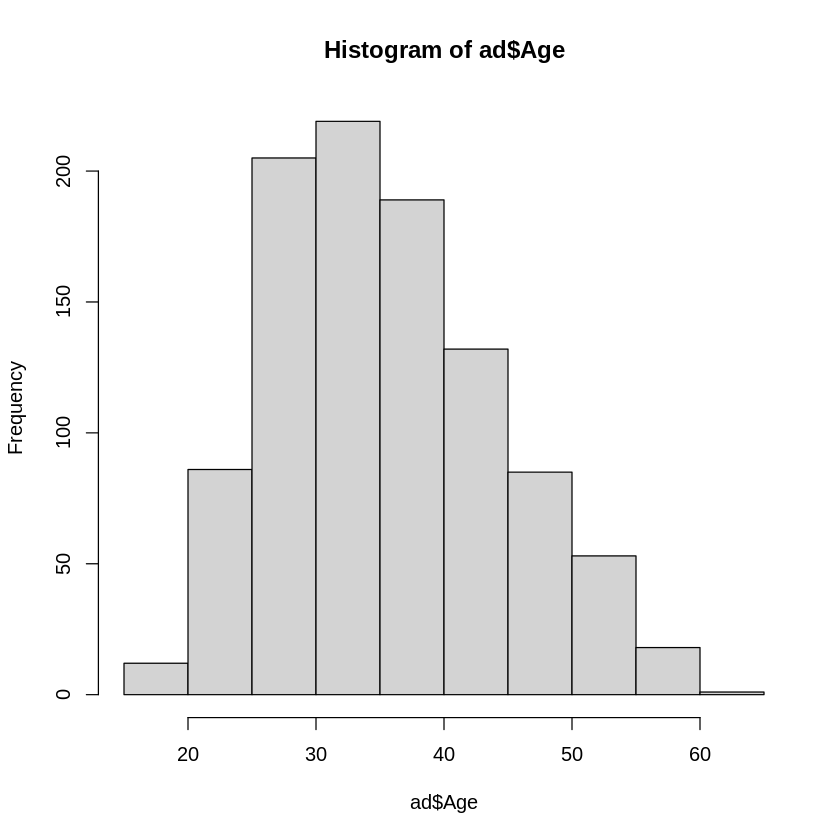

In [89]:
# Plotting a histogram for age variable

hist(ad$Age)



*   The frequency distribution above depicts a relatively normal distribution for the age attribute. Most individuals' age is centered around the mean.




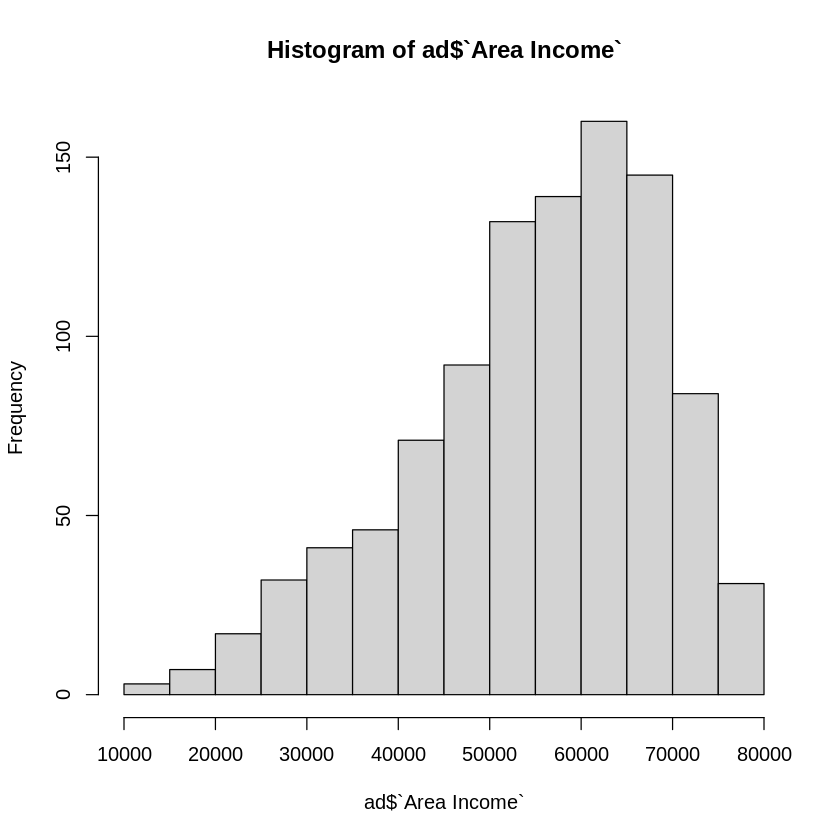

In [90]:
# Plotting a histogram for area income variable

hist(ad$`Area Income`)



*   Income distribution is skewed to the left




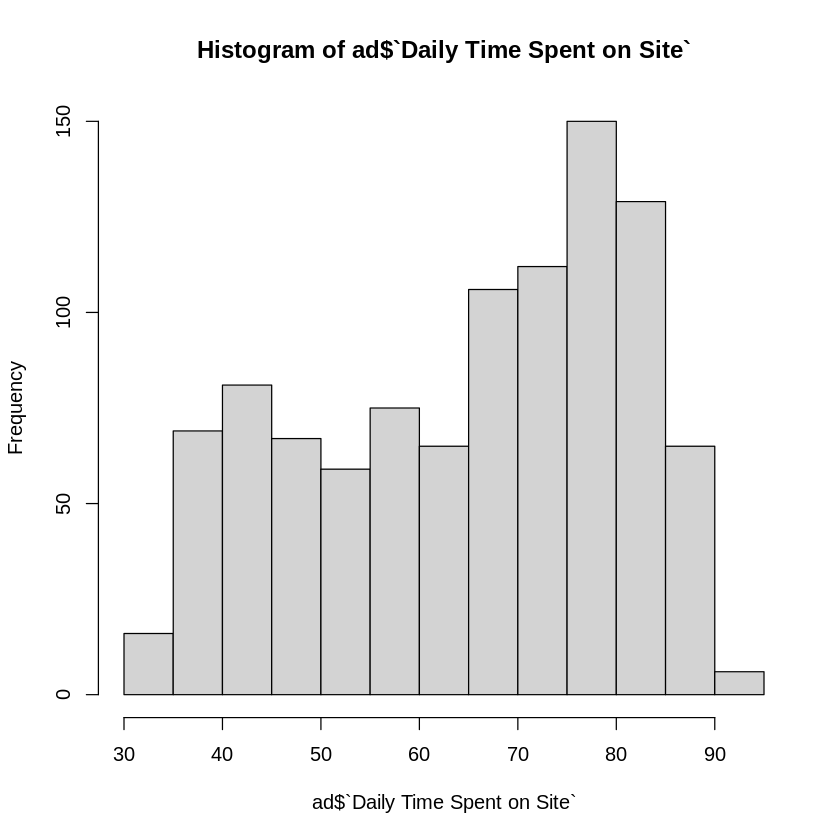

In [91]:
# Plotting a histogram for daily time variable

hist(ad$`Daily Time Spent on Site`)

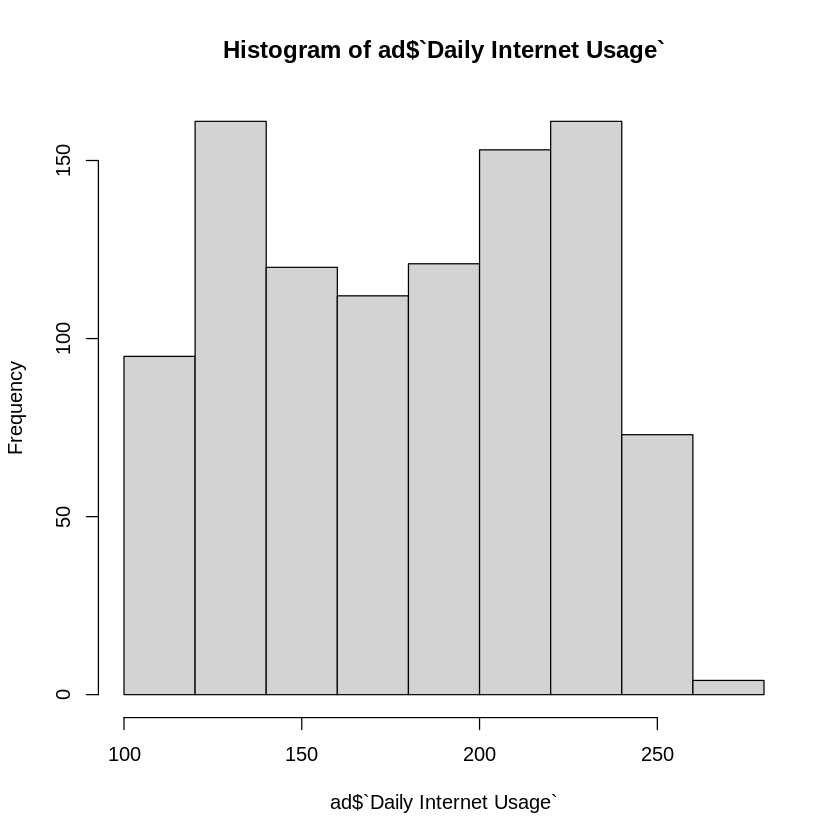

In [92]:
# Plotting a histogram for daily internet variable

hist(ad$`Daily Internet Usage`)

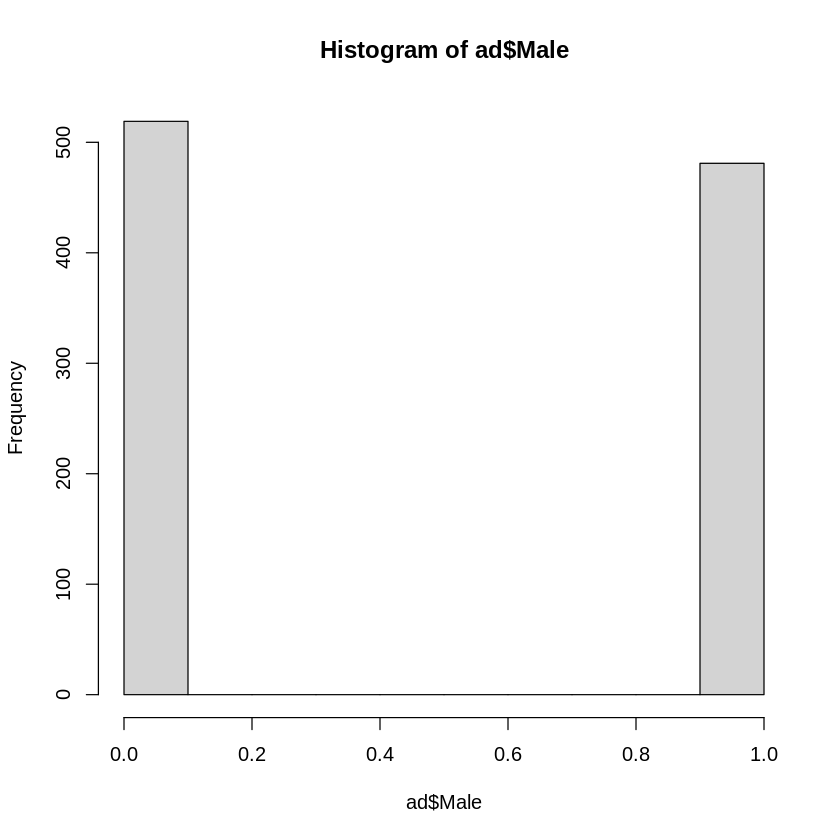

In [93]:
# Plotting a histogram for gender variable

hist(ad$Male)

The number of males and females is fairly balanced

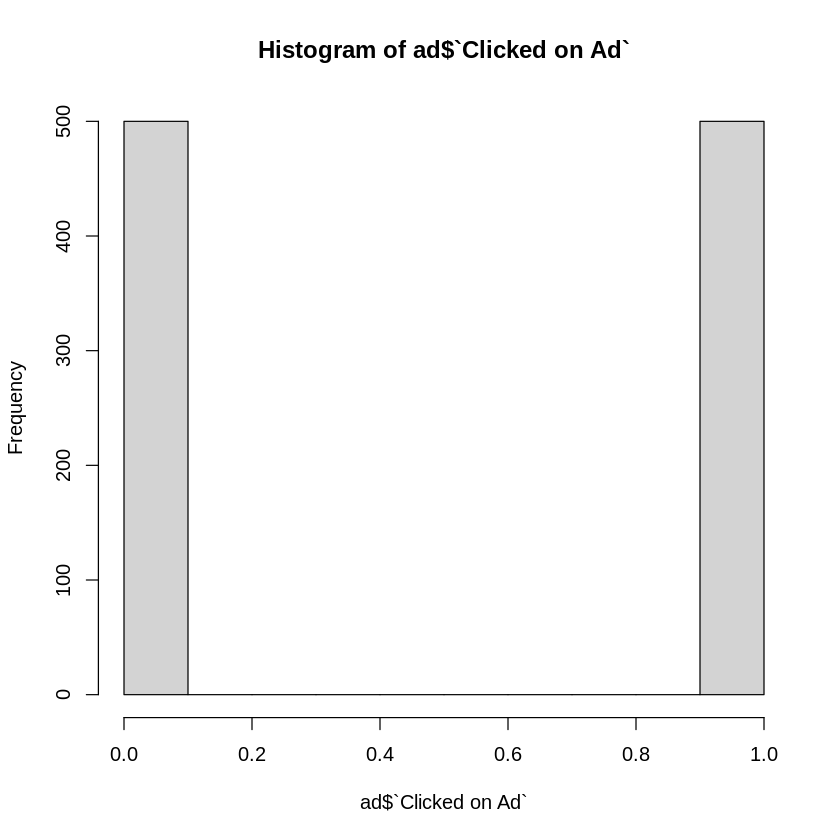

In [94]:
hist(ad$`Clicked on Ad`)

The target variable for this analysis has equal observations for both classes

In [95]:
# Checking actual number of male vs females

table(ad$Male)


  0   1 
519 481 

In [96]:
# Confirming distribution of classes

table(ad$`Clicked on Ad`)


  0   1 
500 500 

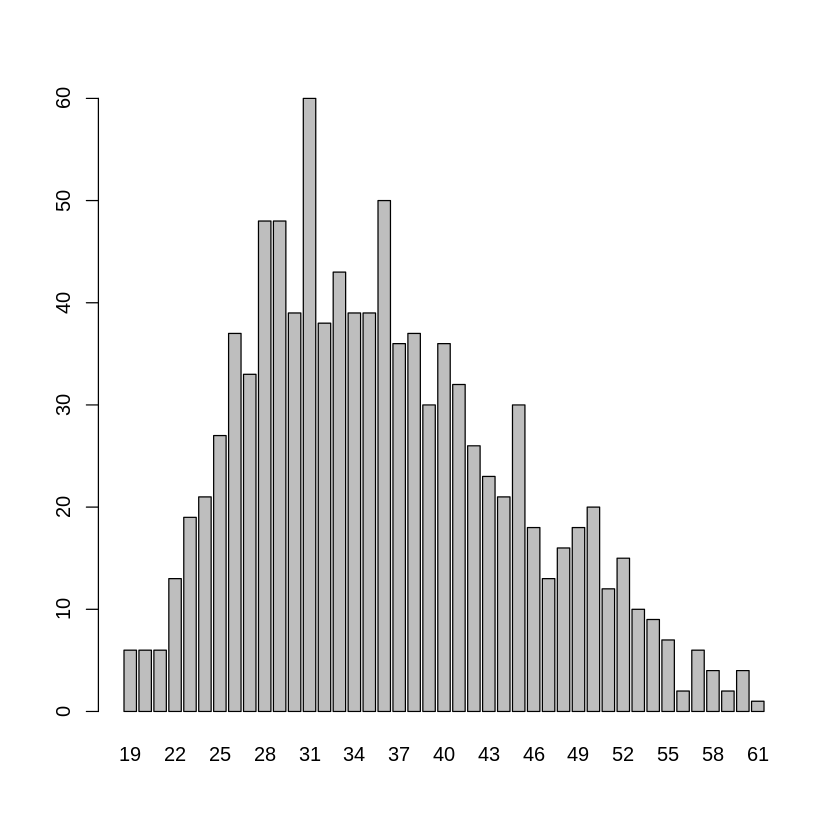

In [97]:
# Bar plot of the age variable

age <- ad$Age
age_freq <- table(age)
barplot(age_freq)

In [98]:
# Checking distribution of each country

table(ad$Country)


                                        Afghanistan 
                                                  8 
                                            Albania 
                                                  7 
                                            Algeria 
                                                  6 
                                     American Samoa 
                                                  5 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  4 
                                           Anguilla 
                                                  6 
       Antarctica (the territory South of 60 deg S) 
                                                  3 
                                Antigua and Barbuda 
                                                  5 
                                          Arg

# Bivariate Analysis

In this section, we investigate the relationship of different variables by creating relevant visualizations such asscatter plots, correlation matrix and Pearson correlation coefficient

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



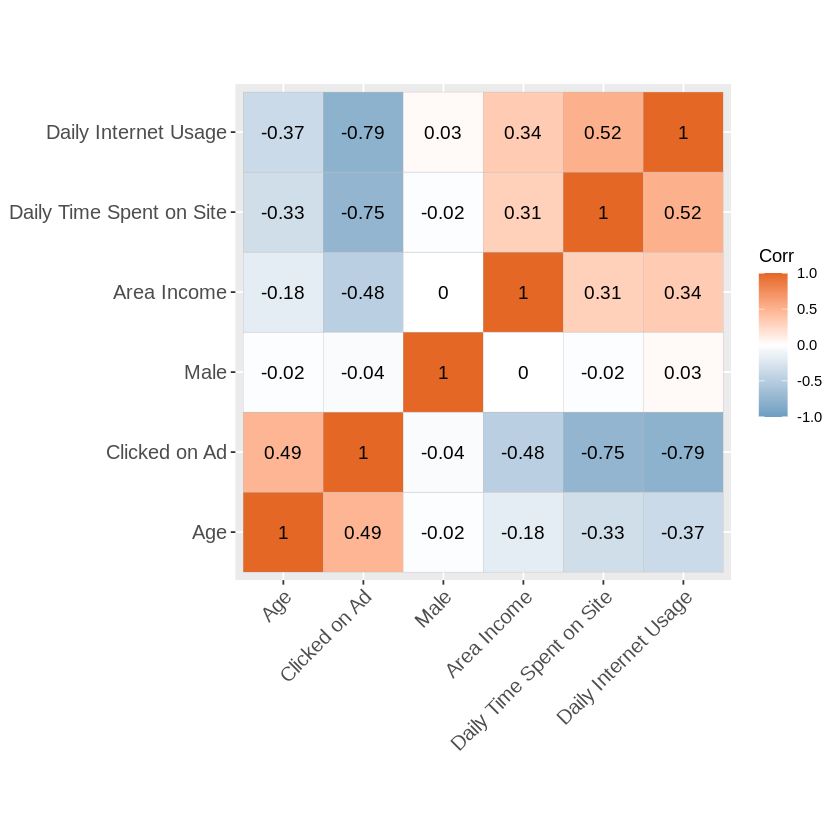

In [99]:
# Checking the correlation coefficients for numeric variables

install.packages("ggcorrplot")
library(ggcorrplot)
corr = round(cor(select_if(my_data, is.numeric)), 2)
ggcorrplot(corr, hc.order = T, ggtheme = ggplot2::theme_gray,
   colors = c("#6D9EC1", "white", "#E46726"), lab = T)

There's a relatively strong negative correlation between daily internet usage, area income, daily time spent on site vs clicked on ad

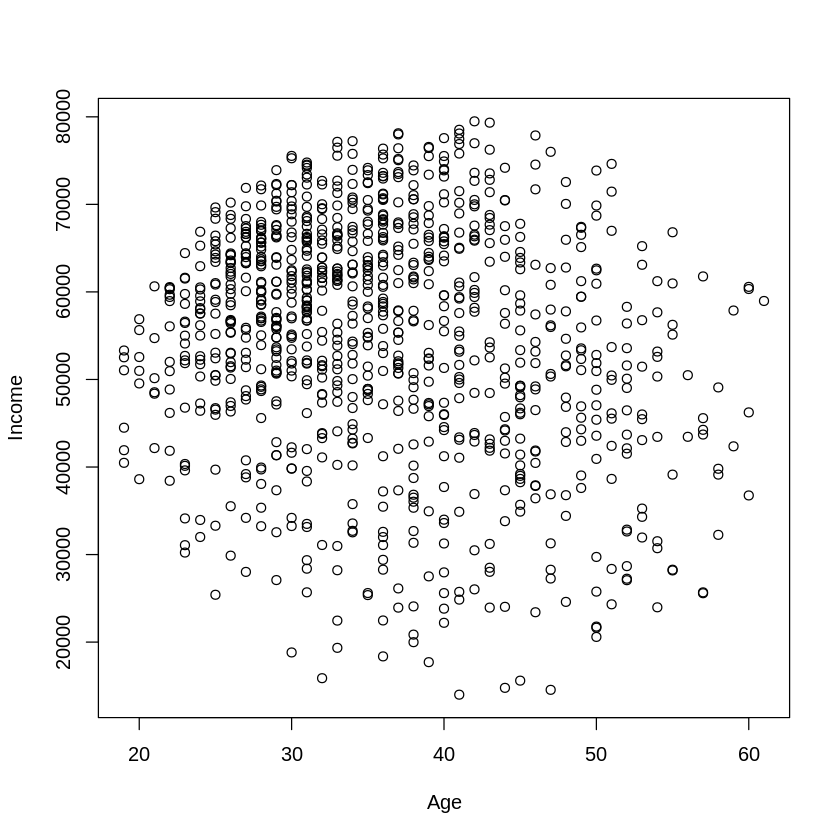

In [100]:
# Scatter plot to compare age vs income

plot(ad$`Age`, ad$`Area Income`, xlab="Age", ylab="Income")

Most high income individuals are between the ages of 30 to 45

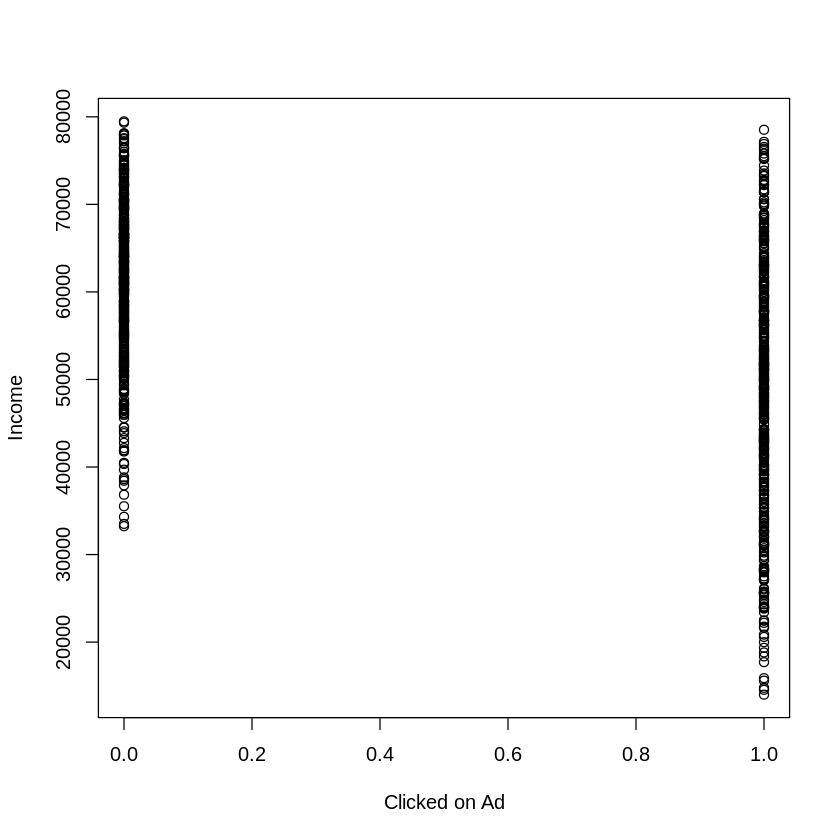

In [101]:
# Scatter plot to compare income vs Clicked on ad

plot(ad$`Clicked on Ad`, ad$`Area Income`, xlab="Clicked on Ad", ylab="Income")

 low income individuals clicked on the ads mostly 

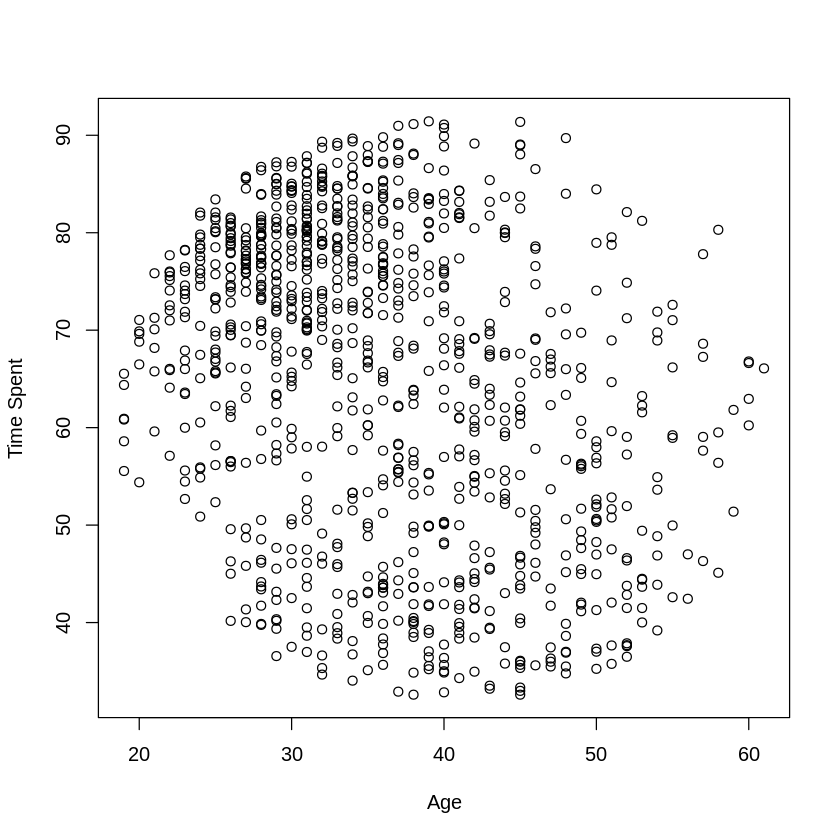

In [102]:
# Scatter plot to compare age vs daily time spent

plot(ad$Age, ad$`Daily Time Spent on Site`, xlab="Age", ylab="Time Spent")

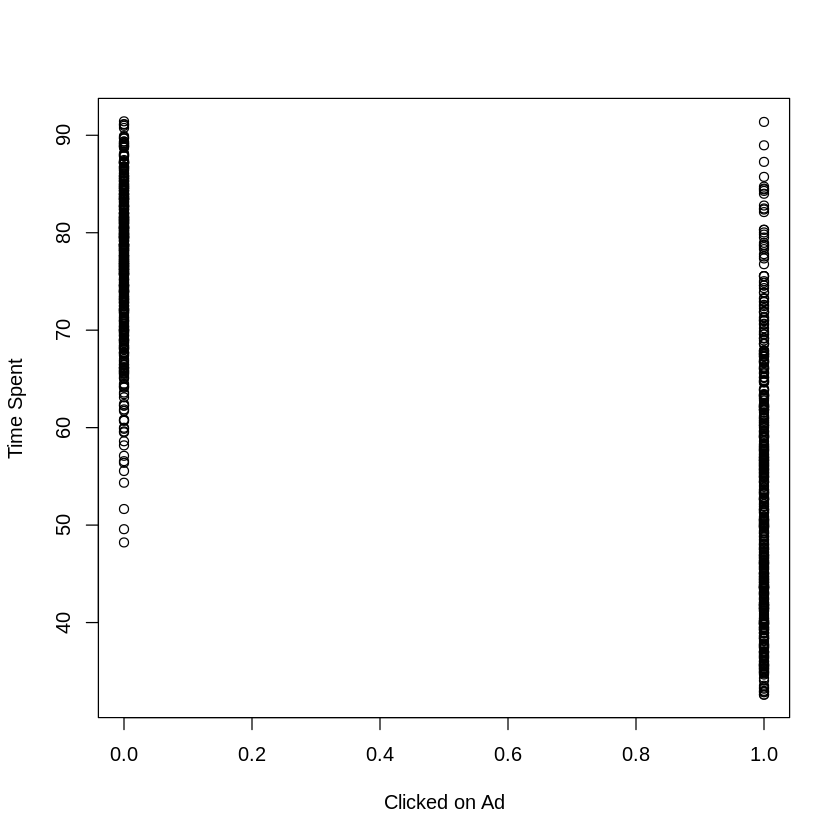

In [103]:
# Scatter plot to compare clicked on ad vs time spent

plot(ad$`Clicked on Ad`, ad$`Daily Time Spent on Site`, xlab="Clicked on Ad", ylab="Time Spent")

Most users who spent the least amount of time on the blog clicked on the ad

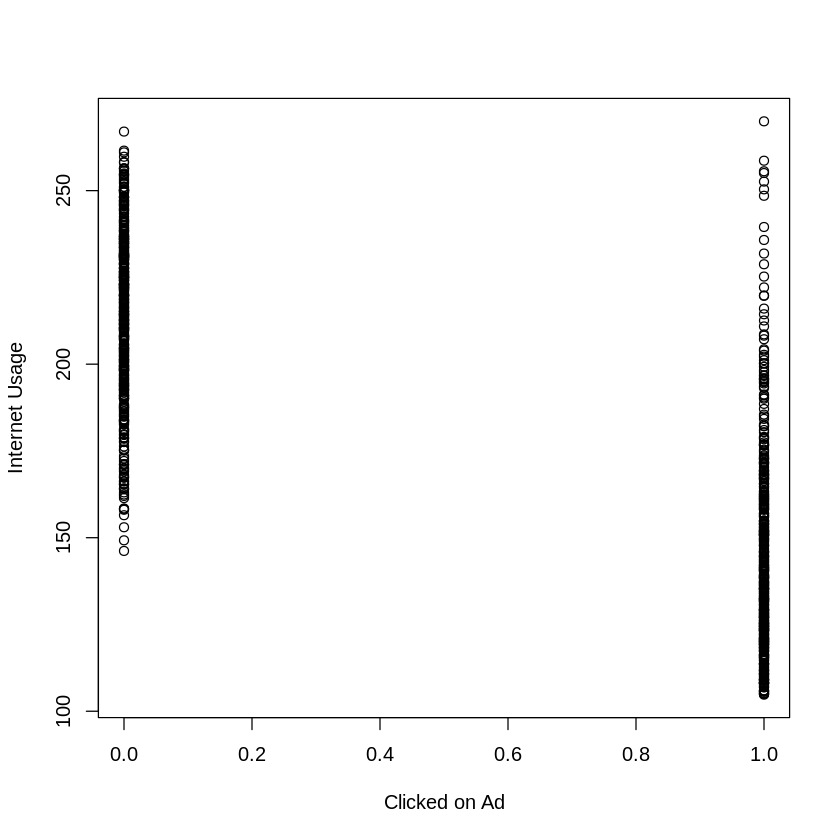

In [104]:
# Scatter plot to compare clicked on ad vs internet usage

plot(ad$`Clicked on Ad`, ad$`Daily Internet Usage`, xlab="Clicked on Ad", ylab="Internet Usage")

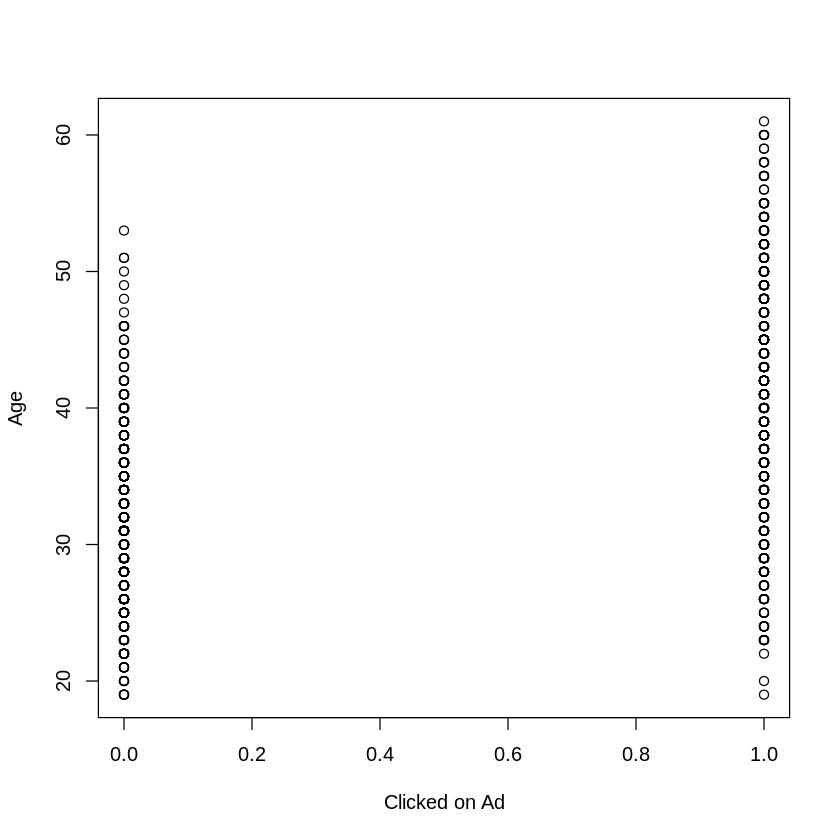

In [105]:
# Scatter plot to compare age vs Clicked on ad

plot(ad$`Clicked on Ad`, ad$`Age`, xlab="Clicked on Ad", ylab="Age")

Clicking on the ad is higher in the middle age compare to the younger and older one. This could be attribute the fact that , younger people don't job and therefore lack money for shoping. 
On the other hand older people have enough to spend money on shop therefore, the will be clicking on the ads.

# Implementing the Solution

In [106]:
# Importing relevant libraries

install.packages("rpart")
install.packages("rpart.plot")
install.packages("mlbench")
install.packages("caret")

library(rpart)
library(rpart.plot)
library(mlbench)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [107]:
names(ad)[names(ad) == 'Clicked on Ad'] <- "Clicked.on.Ad"
names(ad)[names(ad) == 'Daily Time Spent on Site'] <- "Daily.Time.Spent.on.Site"
names(ad)[names(ad) == 'Area Income'] <- "Area.Income"
names(ad)[names(ad) == 'Daily Internet Usage'] <- "Daily.Internet.Usage"


In [108]:
head(ad)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked.on.Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,03/27/2016 0:53,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,03/13/2016 20:35,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,01/10/2016 2:31,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,06/03/2016 3:36,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,05/19/2016 14:30,0


In [114]:
# Defining features and target variables

ad <- ad %>% select(1,2,3,4,7,8,10)

head(ad)

Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Country,Clicked.on.Ad
<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
68.95,35,61833.90,256.09,0,216,0
80.23,31,68441.85,193.77,1,148,0
69.47,26,59785.94,236.50,0,185,0
74.15,29,54806.18,245.89,1,104,0
68.37,35,73889.99,225.58,0,97,0
59.99,23,59761.56,226.74,1,159,0


In [115]:
# Converting the country variable to numeric data type

ad$Country <- as.integer(as.factor(ad$Country))

In [116]:
library(caret)
 
preproc1 <- preProcess(ad[,c(1:6,7)], method=c("center", "scale"))
 
norm1 <- predict(preproc1, ad[,c(1:6,7)])

In [118]:
# Normalizing relevant features

normalize <- function(x){
  return ((x-min(x)) / (max(x)-min(x)))}

ad$Daily.Time.Spent.on.Site <- normalize(ad$Daily.Time.Spent.on.Site )
ad$Age <- normalize(ad$Age)
ad$Area.Income <- normalize(ad$Area.Income)
ad$Daily.Internet.Usage <- normalize(ad$Daily.Internet.Usage)
ad$Country <- normalize(ad$Country)


In [119]:
# Confirming the dimensions of the dataset

dim(ad)

[1] 1000    7

In [120]:
# Creating the test and train sets. We can do a 800/200 split.

data_train <- ad[1:800, ]
data_test <- ad[801:1000,]

In [121]:
# Confirming the dimensions of the train and test sets

dim(data_train)
dim(data_test)

[1] 800   7

[1] 200   7

In [167]:
print(names(ad))

[1] "Daily.Time.Spent.on.Site" "Age"                     
[3] "Area.Income"              "Daily.Internet.Usage"    
[5] "Male"                     "Country"                 
[7] "Clicked.on.Ad"           


In [168]:
install.packages("e1071")
require(e1071)

install.packages("kernlab")
require(kernlab)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: e1071


Attaching package: ‘e1071’


The following object is masked from ‘package:Hmisc’:

    impute


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [169]:
data_train$Clicked.on.Ad = factor(data_train$Clicked.on.Ad)

# Train the model using support vector machine

In [170]:
# Train the model using support vector machine
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
Linear_model <- train(Clicked.on.Ad ~., data=data_train, method='svmLinear', trControl=trctrl, preProcess = c("center", "scale"), tuneLength = 10)
Linear_model

Support Vector Machines with Linear Kernel 

800 samples
  6 predictor
  2 classes: '0', '1' 

Pre-processing: centered (6), scaled (6) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 721, 720, 720, 720, 719, 720, ... 
Resampling results:

  Accuracy   Kappa    
  0.9725554  0.9450257

Tuning parameter 'C' was held constant at a value of 1

In [171]:
# we now need to make a prediction using the trained model and the test data
test_pred <- predict(Linear_model, newdata = data_test)
test_pred

[1] 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1
 [38] 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 [75] 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1
[112] 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1
[149] 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0
[186] 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1
Levels: 0 1

In [172]:
# Train the model using support vector machine Radial method
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
Radial_model <- train(Clicked.on.Ad ~., data=data_train, method='svmRadial', trControl=trctrl, preProcess = c("center", "scale"), tuneLength = 10)
Radial_model

Support Vector Machines with Radial Basis Function Kernel 

800 samples
  6 predictor
  2 classes: '0', '1' 

Pre-processing: centered (6), scaled (6) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 719, 720, 720, 720, 720, 721, ... 
Resampling results across tuning parameters:

  C       Accuracy   Kappa    
    0.25  0.9666911  0.9332242
    0.50  0.9650243  0.9298878
    1.00  0.9616857  0.9232415
    2.00  0.9637640  0.9274276
    4.00  0.9645923  0.9290629
    8.00  0.9629255  0.9257153
   16.00  0.9587743  0.9173990
   32.00  0.9550501  0.9099269
   64.00  0.9521022  0.9040384
  128.00  0.9450240  0.8898694

Tuning parameter 'sigma' was held constant at a value of 0.1329635
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.1329635 and C = 0.25.

In [174]:
# we now need to make a prediction using the trained model and the test data
test_pred <- predict(Radial_model, newdata = data_test)
test_pred

[1] 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1
 [38] 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 [75] 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1
[112] 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1
[149] 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0
[186] 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1
Levels: 0 1

# we use random forest to challenge the solution

In [175]:
#we use random forest to challenge the solution
install.packages("randomForest")
require(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [176]:
# random forest
model_rf = train(Clicked.on.Ad ~ ., data=data_train, method='rf', tuneLength=5, trControl = trctrl)
model_rf

Random Forest 

800 samples
  6 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 720, 721, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9624824  0.9248378
  3     0.9637428  0.9273641
  4     0.9637375  0.9273396
  5     0.9633156  0.9265078
  6     0.9608207  0.9215296

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

# Conclusion and Recommendations

From this analysis, we can see that the SVM linear model displays high accuracy scores and is the best model to use. Furthermore, the following are the groups most likely to click on the ads:


*   People that spend less time on the internet.


*   Low to medium internet users.



*   Users above 40 years.




We recommend that the following considerations be implemented:



*   Target most lucrative locations.


*   Shorter advertisemnts because people don't like to watch long ad 

